### $$
\begin{cases}
\Delta u =f \\
u \Big |_{\Gamma} = 0
\end{cases}
 \implies I(u) = \frac{1}{2}\iint_D\left[u_x^2 + u_y^2 \right]dxdy + 2\iint_Dfudxdy$$

# Replace the function $u$ with its interploation

# $$u(x,y) = \sum_{i, j}u_{ij}\varphi_{i, j}(x,y)$$

# The necessary condition of stationary point for the functional is
### $$\frac{\partial I}{\partial u} = 0 \implies \frac{\partial}{\partial u_{kl}}I \left(\sum_{i, j}u_{ij}\varphi_{i, j}(x,y)\right) = 0$$ 

### $$ \frac{\partial}{\partial u_{kl}} \left\{\frac{1}{2} \iint_D\left[\left(\sum_{ij}u_{ij}\varphi_{x, ij}(x,y)\right)^2 + \left(\sum_{ij}u_{ij}\varphi_{y, ij}(x,y)\right)^2 \right]dxdy + 2\iint_D\sum_{ij}u_{ij}\varphi_{ij}(x,y)dxdy\right\} = 0$$

##### $$\left(\sum_{ij}u_{ij}\varphi_{x, ij}(x,y)\right)^2 = u_{kl}^2\varphi_{x, kl}^2(x,y) + 2u_{kl}\varphi_{x, kl}(x,y)[\dots] + [\dots]^2$$

##### $$\left(\sum_{ij}u_{ij}\varphi_{y, ij}(x,y)\right)^2 = u_{kl}^2\varphi_{y, kl}^2(x,y) + 2u_{kl}\varphi_{x, kl}(x,y)[\dots] + [\dots]^2$$

#### $$\frac{\partial}{\partial u_{kl}}I \left(\sum_{i, j}u_{ij}\varphi_{i, j}(x,y)\right)= \iint_D \left[2u_{kl}\varphi_{x, kl}^2(x,y) + 2u_{kl}\varphi_{x, kl}(x,y)[\dots] + 2u_{kl}\varphi_{y, kl}^2(x,y) + 2u_{kl}\varphi_{y, kl}(x,y)[\dots] + 2f_{kl}u_{kl}\varphi_{kl}(x,y)\right]dxdy$$

#### $$\frac{\partial}{\partial u_{kl}}I \left(\sum_{i, j}u_{ij}\varphi_{i, j}(x,y)\right)= 8u_{k,l} - 2u_{k, l-1} - u_{k, l+1} - 2u_{k-1,l} - 2u_{k+1,l} = 0$$

In [1]:
import torch
import numpy
from tqdm import tqdm
import matplotlib.pyplot as plt

In [2]:
def f(x, y):
    return x*y

In [3]:
n_points = 30

In [4]:
grid = torch.linspace(-10, 10, n_points)
grid_x, grid_y = torch.meshgrid(grid, grid, indexing="ij")
grid_z = f(grid_x, grid_y)
h_1=h_2=grid[1]-grid[0]

In [5]:
b = -grid_z.reshape(-1)

# Dirichlet boundary 

In [6]:
# zz = torch.zeros_like(grid_x)
# zz[:] = 0.5
# zz[4:6, 2:3] = 1
# pos_mask = (zz == 1)
# zz[4:6, 7:8] = 0
# neg_mask = (zz == 0)

In [7]:
# pos_mask = pos_mask.reshape(-1)
# neg_mask = neg_mask.reshape(-1)
# b[pos_mask] = 1
# b[neg_mask] = 0

In [8]:
matrix = torch.zeros(n_points**2, n_points**2)

In [18]:
def bound_f(x, y):
    return x*y*0

In [19]:
for i in range(n_points**2):
    
    #This is Dirichlet boundary condition
#     if (pos_mask[i].item() is True) or (neg_mask[i].item() is True):
#         matrix[i]*=0
#         matrix[i,i] = 1
#         continue
    
    idx = numpy.unravel_index(i, (n_points, n_points))
    
    
    
    #These are Neuman boundary conditions
#     if idx[0] == 0:
#         matrix[i]*=0
#         matrix[i, i] = 1
#         matrix[i, i+n_points] = -1
#         b[i] = 0
#         continue

#     if idx[0] == n_points - 1:
#         matrix[i]*=0
#         matrix[i, i] = 1
#         matrix[i, i-n_points] = -1
#         b[i] = 0
#         continue

#     if idx[1] == 0:
#         matrix[i]*=0
#         matrix[i, i] = 1
#         matrix[i, i+1] = -1
#         b[i] = 0
#         continue

        
#     if idx[1] == n_points - 1:
#         matrix[i]*=0
#         matrix[i, i] = 1
#         matrix[i, i-1] = -1
#         b[i] = 0
#         continue

    #These are Dirichlet boundary conditions 
    if idx[0] == 0:
        matrix[i]*=0
        matrix[i, i] = 1
        b[i] = bound_f(grid_x[idx], grid_y[idx])
        continue

    if idx[0] == n_points - 1:
        matrix[i]*=0
        matrix[i, i] = 1
        b[i] = bound_f(grid_x[idx], grid_y[idx])
        continue

    if idx[1] == 0:
        matrix[i]*=0
        matrix[i, i] = 1
        b[i] = bound_f(grid_x[idx], grid_y[idx])
        continue

        
    if idx[1] == n_points - 1:
        matrix[i]*=0
        matrix[i, i] = 1
        b[i] = bound_f(grid_x[idx], grid_y[idx])
        continue
    
    matrix[i, i] = 8
    
    if (i+1) < n_points**2:
            matrix[i, i+1] = -2
        
    if (i-1) > 0:
            matrix[i, i-1] = -2
    
    if i+n_points+1 < n_points**2:
            matrix[i, i+n_points] = -2
    
    if i-n_points > 0:
            matrix[i, i-n_points] = -2

In [20]:
u = torch.linalg.solve(matrix, b)

In [21]:
u = u.reshape(n_points, n_points)

In [22]:
def phi(X, Y, h1, h2, i, j, n_x, n_y):
    
    tx = torch.linspace(X.min(), X.max(), n_x)
    ty = torch.linspace(Y.min(), Y.max(), n_y)
    
    xx, yy = torch.meshgrid(tx, ty, indexing="ij")
    xm = xx.min()
    ym = yy.min()
    
    xx = xx - ym
    yy = yy - ym
    
    tmp = torch.zeros(xx.shape)
        
    S1 = (i <= xx/h1) & (xx/h1 <= i + 1) & (j <= yy/h2) & (yy/h2 <= j + 1) & (yy/h2 - j >= xx/h1 - i)
    tmp[S1] = (j + 1 - yy/h2)[S1]
    
    S2 = (i - 1 <= xx/h1) & (xx/h1 <= i) & (j <= yy/h2) & (yy/h2 <= j + 1) & (yy/h2 - j <= 1 + xx/h1 - i)
    tmp[S2] = (1 + xx/h1 - yy/h2 - i + j)[S2]
    
    S3 = (i - 1 <= xx/h1) & (xx/h1 <= i) & (j - 1 <= yy/h2) & (yy/h2 <= j) & (yy/h2 - j >= xx/h1 - i)
    tmp[S3] = (1 + xx/h1 - i)[S3]
    
    S4 = (i - 1 <= xx/h1) & (xx/h1 <= i) & (j - 1 <= yy/h2) & (yy/h2 <= j) & (yy/h2 - j <= xx/h1 - i)
    tmp[S4] = (1 + yy/h2 - j)[S4]
    
    S5 = (i <= xx/h1) & (xx/h1 <= i + 1) & (j - 1 <= yy/h2) & (yy/h2 <= j) & (yy/h2 - j >= xx/h1 - i - 1)
    tmp[S5] = (1 - xx/h1 + yy/h2 + i - j)[S5]
    
    S6 = (i <= xx/h1) & (xx/h1 <= i + 1) & (j <= yy/h2) & (yy/h2 <= j + 1) & (yy/h2 - j <= xx/h1 - i)
    tmp[S6] = (1 - xx/h1 + i)[S6]
    
    return tmp

In [23]:
t = torch.linspace(grid[0], grid[-1], 100)
xx, yy, = torch.meshgrid(t, t, indexing="ij")

zz = torch.zeros_like(xx)

for i in range(n_points):
    for j in range(n_points):
        zz += phi(t, t, h_1, h_2, i, j, 100, 100)*u[i][j]

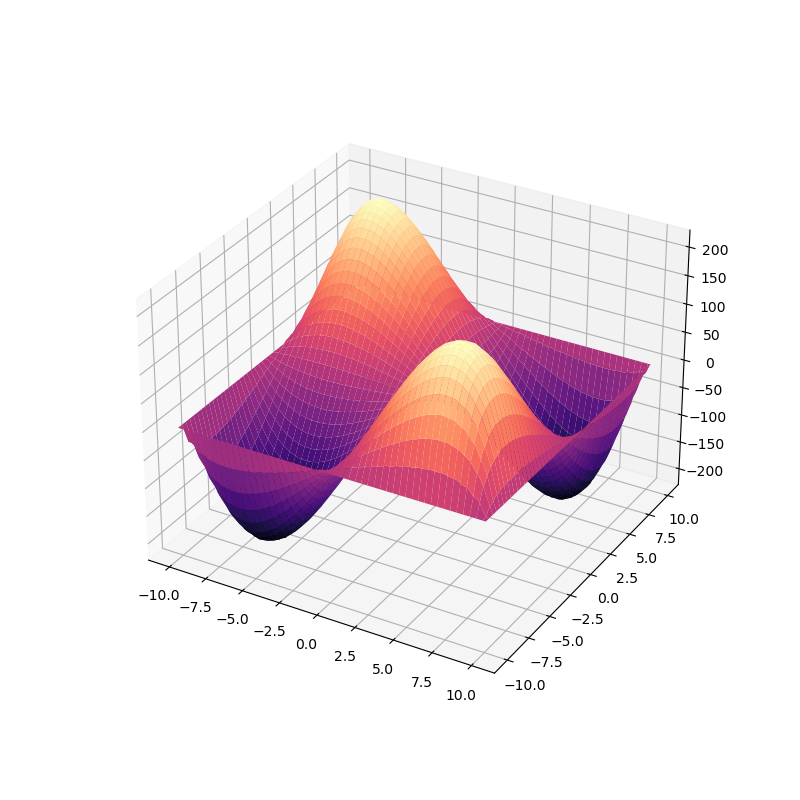

In [24]:
%matplotlib widget
fig = plt.figure(figsize=(8, 8))
ax = plt.axes(projection='3d')
ax.plot_surface(xx, yy, zz, cmap="magma")
#ax.scatter(grid_x, grid_y, u, color="red", s=100)

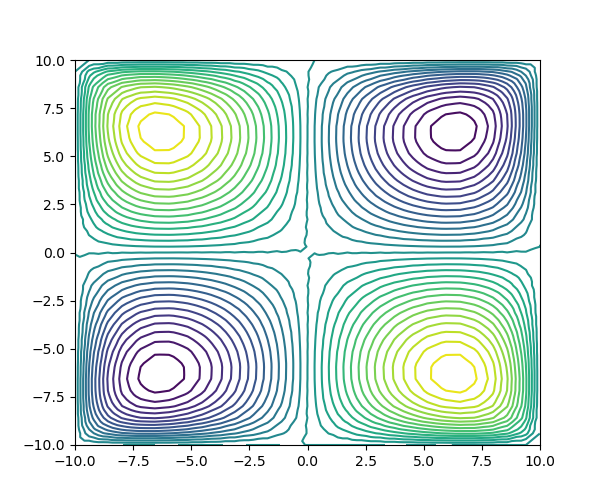

In [25]:
plt.figure(figsize=(6,5))
CS = plt.contour(t, t, zz, levels=30)
plt.show()